# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
pip install plotly==4.5.2

     |████████████████████████████████| 7.1MB 5.3MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


## Import Statements

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [2]:
pd.options.display.float_format = "{:,.2f}".format

## Load the Data

In [3]:
df_hh_income = pd.read_csv("Median_Household_Income_2015.csv", encoding="windows-1252")
df_pct_poverty = pd.read_csv("Pct_People_Below_Poverty_Level.csv", encoding="windows-1252")
df_pct_completed_hs = pd.read_csv("Pct_Over_25_Completed_High_School.csv", encoding="windows-1252")
df_share_race_city = pd.read_csv("Share_of_Race_By_City.csv", encoding="windows-1252")
df_fatalities = pd.read_csv("Deaths_by_Police_US.csv", encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
print(f"'Median Household Income 2015' DataFrame has {df_hh_income.shape[0]} rows and {df_hh_income.shape[1]} columns")
print()

print(f"'Percentage of People Below Poverty Level' DataFrame has {df_pct_poverty.shape[0]} rows and {df_pct_poverty.shape[1]} columns")
print()

print(f"'Percentage Over 25 That Completed High School' DataFrame has {df_pct_completed_hs.shape[0]} rows and {df_pct_completed_hs.shape[1]} columns")
print()

print(f"'Share of Race By City' DataFrame has {df_share_race_city.shape[0]} rows and {df_share_race_city.shape[1]} columns")
print()

print(f"'Deaths by Police in the US' DataFrame has {df_fatalities.shape[0]} rows and {df_fatalities.shape[1]} columns")

'Median Household Income 2015' DataFrame has 29322 rows and 3 columns

'Percentage of People Below Poverty Level' DataFrame has 29329 rows and 3 columns

'Percentage Over 25 That Completed High School' DataFrame has 29329 rows and 3 columns

'Share of Race By City' DataFrame has 29268 rows and 7 columns

'Deaths by Police in the US' DataFrame has 2535 rows and 14 columns


In [20]:
print(df_hh_income.columns)
print()

print(df_pct_poverty.columns)
print()

print(df_pct_completed_hs.columns)
print()

print(df_share_race_city.columns)
print()

print(df_fatalities.columns)

Index(['Geographic Area', 'City', 'Median Income'], dtype='object')

Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')

Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')

Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [21]:
print(f"Any NaN values? {df_hh_income.isna().values.any()}")
print()

print(f"Any NaN values? {df_pct_poverty.isna().values.any()}")
print()

print(f"Any NaN values? {df_pct_completed_hs.isna().values.any()}")
print()

print(f"Any NaN values? {df_share_race_city.isna().values.any()}")
print()

print(f"Any NaN values? {df_fatalities.isna().values.any()}")

Any NaN values? True

Any NaN values? False

Any NaN values? False

Any NaN values? False

Any NaN values? True


In [4]:
print(f"{df_hh_income.isna().values.sum()} cells contain NaN values")
print()

print(f"There are {len(df_hh_income[df_hh_income.isna().any(axis=1)])} rows with NaN values")
print()

df_hh_income.fillna(0, inplace=True)

print(f"{df_hh_income.isna().values.sum()} cells contain NaN values")
print()

print(f"There are {len(df_hh_income[df_hh_income.isna().any(axis=1)])} rows with NaN values")

51 cells contain NaN values

There are 51 rows with NaN values

0 cells contain NaN values

There are 0 rows with NaN values


In [5]:
print(f"{df_fatalities.isna().values.sum()} cells contain NaN values")
print()

print(f"There are {len(df_fatalities[df_fatalities.isna().any(axis=1)])} rows with NaN values")
print()

df_fatalities.fillna(0, inplace=True)

print(f"{df_fatalities.isna().values.sum()} cells contain NaN values")
print()

print(f"There are {len(df_fatalities[df_fatalities.isna().any(axis=1)])} rows with NaN values")

346 cells contain NaN values

There are 281 rows with NaN values

0 cells contain NaN values

There are 0 rows with NaN values


In [27]:
print(f"Any duplicates? {df_hh_income.duplicated().values.any()}")
print()

print(f"Any duplicates? {df_pct_poverty.duplicated().values.any()}")
print()

print(f"Any duplicates? {df_pct_completed_hs.duplicated().values.any()}")
print()

print(f"Any duplicates? {df_share_race_city.duplicated().values.any()}")
print()

print(f"Any duplicates? {df_fatalities.duplicated().values.any()}")
print()

Any duplicates? False

Any duplicates? False

Any duplicates? False

Any duplicates? False

Any duplicates? False



# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [6]:
index_list = df_pct_poverty[df_pct_poverty.poverty_rate == "-"].index
df_pct_poverty.drop(index=index_list, inplace=True)
df_pct_poverty.poverty_rate = df_pct_poverty.poverty_rate.astype(float)

In [7]:
poverty_rank = df_pct_poverty.groupby(by="Geographic Area", as_index=False).agg({"poverty_rate": pd.Series.mean})
poverty_rank.sort_values(by="poverty_rate", ascending=False, inplace=True)
poverty_rank.head()

,Geographic Area,poverty_rate
25,MS,26.88
3,AZ,25.67
10,GA,23.78
32,NM,23.08
2,AR,22.96


In [53]:
poverty_rank.tail()

,Geographic Area,poverty_rate
20,MD,10.31
50,WY,9.89
19,MA,9.59
6,CT,9.14
31,NJ,8.19


<BarContainer object of 51 artists>

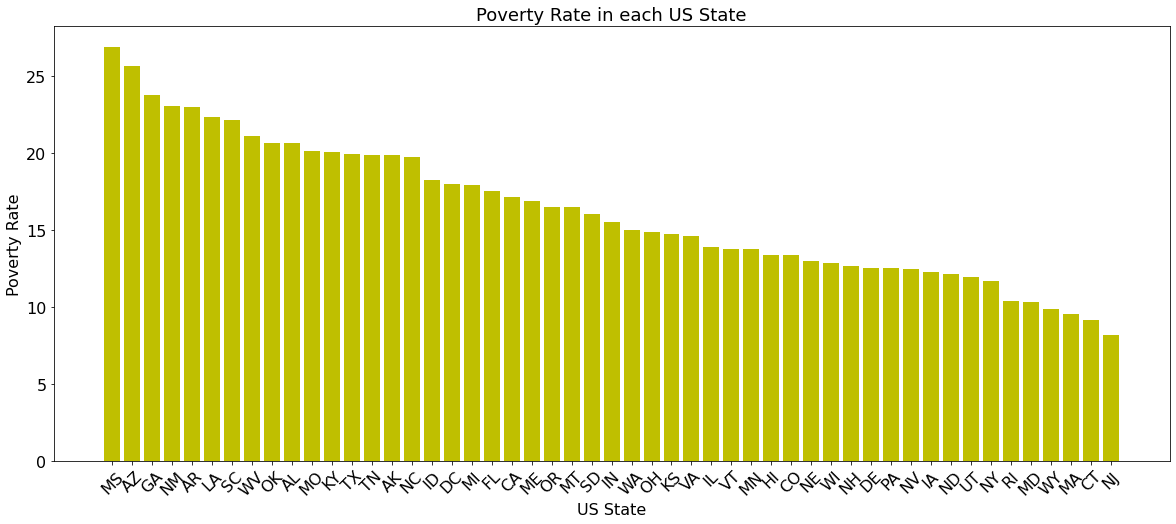

In [136]:
plt.figure(figsize=(20,8))
plt.title("Poverty Rate in each US State", fontsize=18)

plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)
plt.ylabel("Poverty Rate", fontsize=16)
plt.xlabel("US State", fontsize=16)

plt.bar(poverty_rank["Geographic Area"], poverty_rank.poverty_rate, color="y")

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [68]:
hs_list = df_pct_completed_hs[df_pct_completed_hs.percent_completed_hs == "-"].index
df_pct_completed_hs.drop(index=hs_list, inplace=True)
df_pct_completed_hs.percent_completed_hs = df_pct_completed_hs.percent_completed_hs.astype(float)

In [74]:
hsg_rank = df_pct_completed_hs.groupby(by="Geographic Area", as_index=False).agg({"percent_completed_hs": pd.Series.mean})
hsg_rank.sort_values(by="percent_completed_hs", ascending=True, inplace=True)
hsg_rank.head()

,Geographic Area,percent_completed_hs
43,TX,75.69
25,MS,78.47
10,GA,79.01
18,LA,79.29
2,AR,79.95


In [75]:
hsg_rank.tail()

,Geographic Area,percent_completed_hs
6,CT,91.59
44,UT,91.62
11,HI,91.67
50,WY,92.10
19,MA,92.40


<BarContainer object of 51 artists>

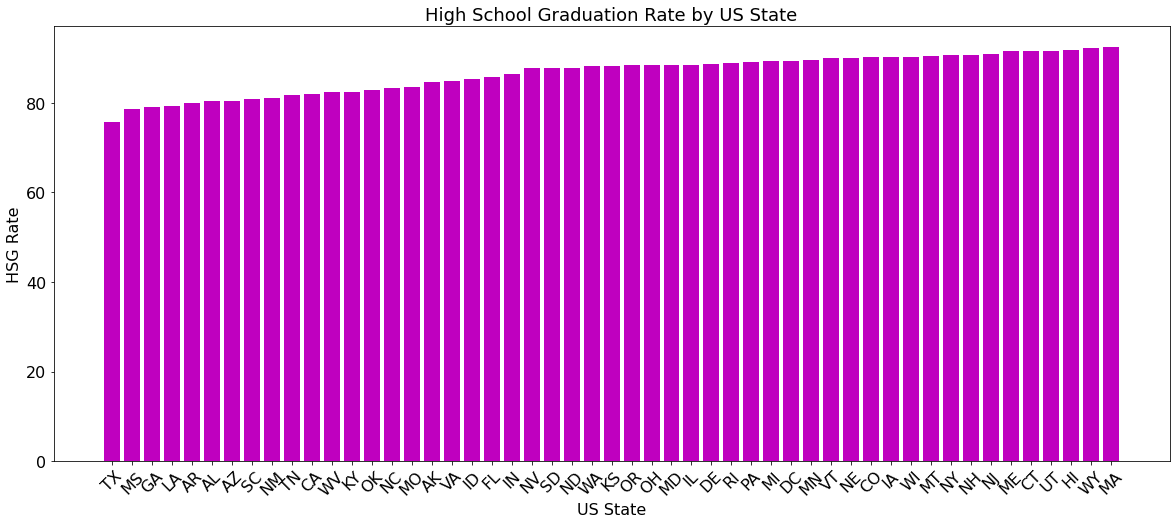

In [137]:
plt.figure(figsize=(20,8))
plt.title("High School Graduation Rate by US State", fontsize=18)

plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)
plt.ylabel("HSG Rate", fontsize=16)
plt.xlabel("US State", fontsize=16)

plt.bar(hsg_rank["Geographic Area"], hsg_rank.percent_completed_hs, color="m")

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [101]:
merged_df = pd.merge(poverty_rank, hsg_rank, on="Geographic Area")
merged_df.head()

,Geographic Area,poverty_rate,percent_completed_hs
0,MS,26.88,78.47
1,AZ,25.67,80.47
2,GA,23.78,79.01
3,NM,23.08,80.98
4,AR,22.96,79.95


Text(0, 0.5, 'HSG Rate')

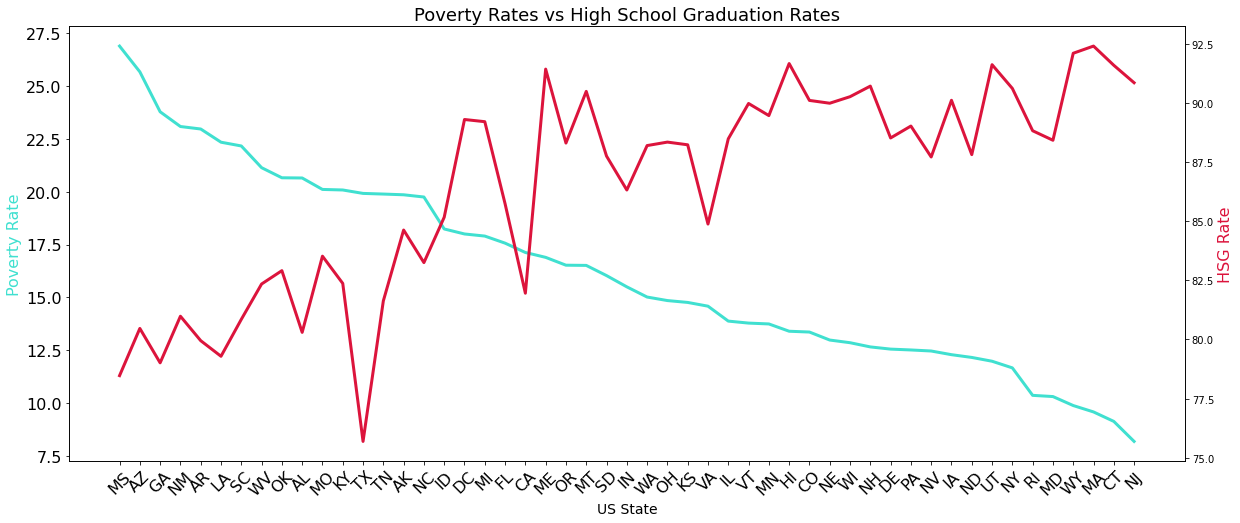

In [138]:
plt.figure(figsize=(20, 8))
plt.title("Poverty Rates vs High School Graduation Rates", fontsize=18)
plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(merged_df["Geographic Area"], merged_df.poverty_rate, linewidth=3, color="turquoise")
ax2.plot(merged_df["Geographic Area"], merged_df.percent_completed_hs, linewidth=3, color="crimson")

ax1.set_xlabel("US State", fontsize=14)
ax1.set_ylabel("Poverty Rate", color="turquoise", fontsize=16)
ax2.set_ylabel("HSG Rate", color="crimson", fontsize=16)

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

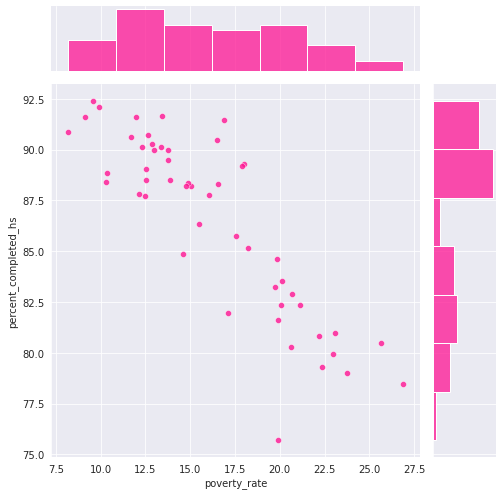

In [139]:
with sns.axes_style("darkgrid"):

  sns.jointplot(data=merged_df,
                x="poverty_rate",
                y="percent_completed_hs",
                joint_kws={"alpha": 0.8},
                height=7,
                color="deeppink")
  
plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

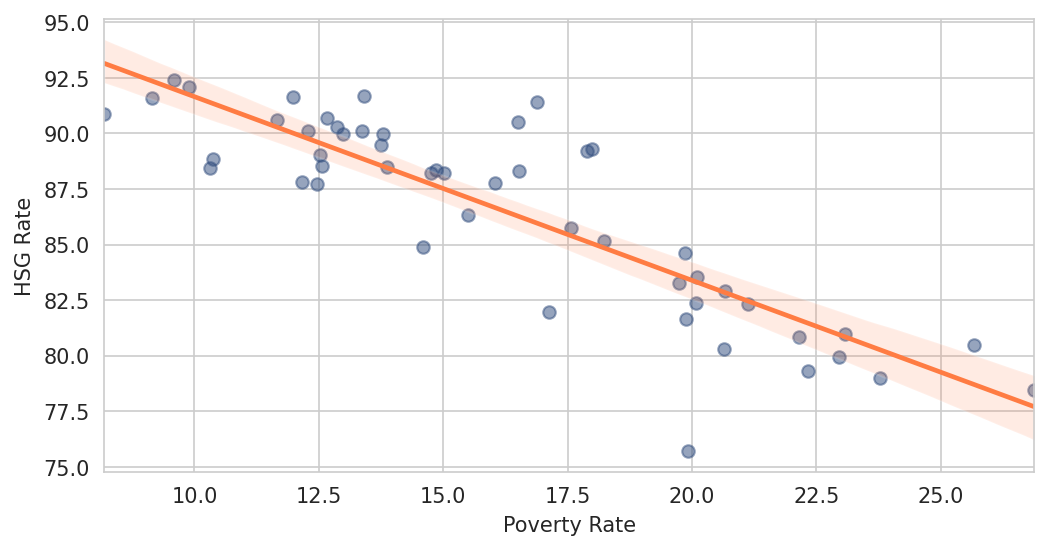

In [119]:
plt.figure(figsize=(8,4), dpi=150)

with sns.axes_style("whitegrid"):
  ax = sns.regplot(data=merged_df, 
                   x="poverty_rate",
                   y="percent_completed_hs",
                   scatter_kws = {"alpha": 0.5, "color": "#2f4b7c"},
                   line_kws = {"color": "#ff7c43"})
  
  ax.set(ylabel="HSG Rate",
         xlabel="Poverty Rate")

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [9]:
race_list = df_share_race_city[df_share_race_city.share_white == "(X)"].index
df_share_race_city.drop(index=race_list, inplace=True)

In [10]:
df_share_race_city.share_white = df_share_race_city.share_white.astype(float)
df_share_race_city.share_black = df_share_race_city.share_black.astype(float)
df_share_race_city.share_native_american = df_share_race_city.share_native_american.astype(float)
df_share_race_city.share_asian = df_share_race_city.share_asian.astype(float)
df_share_race_city.share_hispanic = df_share_race_city.share_hispanic.astype(float)

In [11]:
racial_makeup = df_share_race_city.groupby(by="Geographic area", as_index=False).agg({"share_black": pd.Series.mean, "share_asian": pd.Series.mean, 
                                                                                      "share_hispanic": pd.Series.mean, "share_native_american": pd.Series.mean})

white = 100 - (racial_makeup.share_black + racial_makeup.share_asian + racial_makeup.share_hispanic + racial_makeup.share_native_american)
racial_makeup["share_white"] = white

racial_makeup.head()

,Geographic area,share_black,share_asian,share_hispanic,share_native_american,share_white
0,AK,0.57,1.39,2.15,45.86,50.03
1,AL,23.32,0.48,2.98,0.66,72.56
2,AR,16.30,0.48,4.27,0.76,78.19
3,AZ,0.95,0.73,20.14,28.59,49.58
4,CA,2.69,5.57,29.65,1.72,60.37


In [12]:
racial_makeup.tail()

,Geographic area,share_black,share_asian,share_hispanic,share_native_american,share_white
46,VT,0.77,0.91,1.38,0.37,96.57
47,WA,1.43,3.07,10.61,3.75,81.14
48,WI,0.94,0.79,3.32,2.62,92.33
49,WV,2.92,0.34,0.90,0.20,95.64
50,WY,0.40,0.39,6.02,3.10,90.10


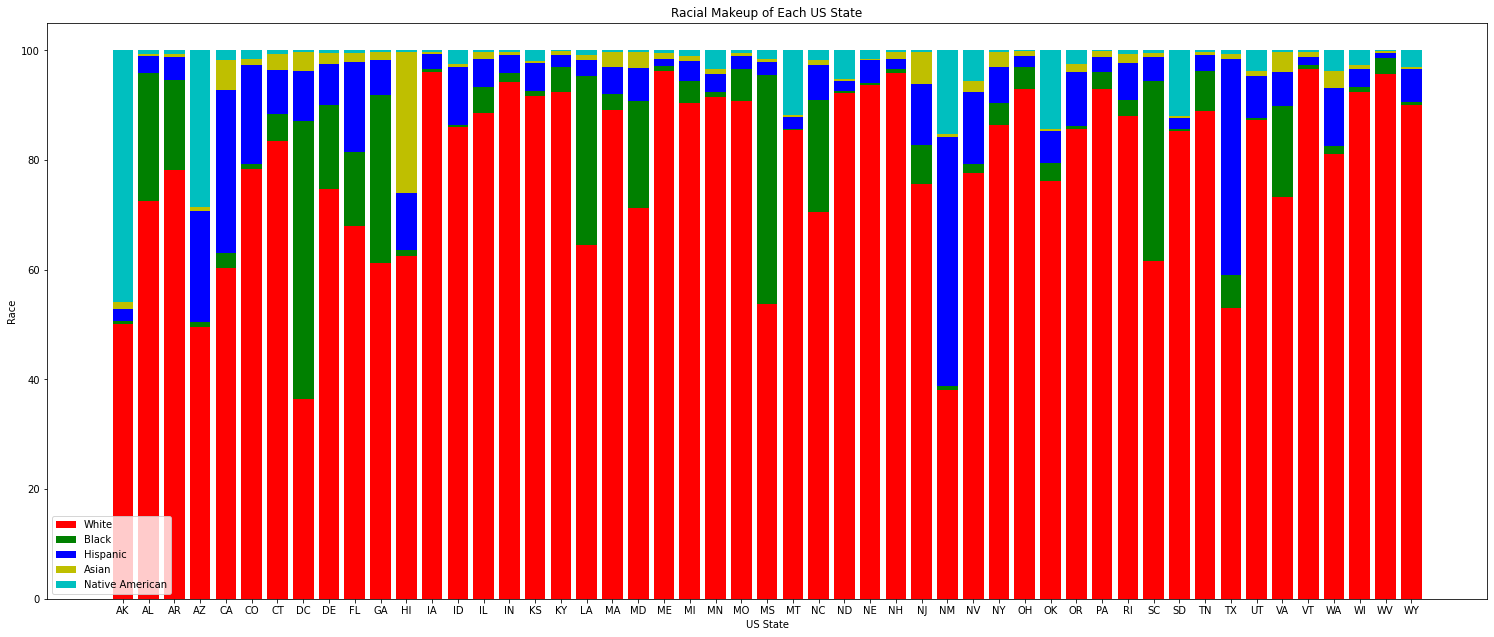

In [14]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_axes([0,0,1,1])

ax.bar(racial_makeup["Geographic area"], racial_makeup.share_white, color="r", label="White")

ax.bar(racial_makeup["Geographic area"], racial_makeup.share_black, bottom=racial_makeup.share_white, color="g", label="Black")

ax.bar(racial_makeup["Geographic area"], racial_makeup.share_hispanic, bottom=np.array(racial_makeup.share_white)+np.array(racial_makeup.share_black),
       color="b", label="Hispanic")

ax.bar(racial_makeup["Geographic area"], racial_makeup.share_asian, color="y", label="Asian",
       bottom=np.array(racial_makeup.share_black)+np.array(racial_makeup.share_white)+np.array(racial_makeup.share_hispanic))

ax.bar(racial_makeup["Geographic area"], racial_makeup.share_native_american, color="c", label="Native American",
       bottom=np.array(racial_makeup.share_black)+np.array(racial_makeup.share_white)+np.array(racial_makeup.share_hispanic)+np.array(racial_makeup.share_asian))

ax.set_ylabel("Race")
ax.set_xlabel("US State")

ax.set_title("Racial Makeup of Each US State")
ax.legend()
fig.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [85]:
races = df_fatalities.race.value_counts()
races.drop(index=0, inplace=True)
races.rename(index={"W": "White", "B": "Black", "A": "Asian", "H": "Hispanic", "N": "Native American", "O": "Other Race"}, inplace=True)
races

White              1201
Black               618
Hispanic            423
Asian                39
Native American      31
Other Race           28
Name: race, dtype: int64

In [86]:
fig = px.pie(labels=races.index,
             values=races.values,
             title="People Killed by Race",
             names=races.index,
             hole=0.6)

fig.update_traces(textposition="inside", textinfo="percent", textfont_size=15)
 
fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [38]:
genders = df_fatalities.gender.value_counts()
genders.rename(index={"M": "Male", "F": "Female"}, inplace=True)
genders

Male      2428
Female     107
Name: gender, dtype: int64

<BarContainer object of 2 artists>

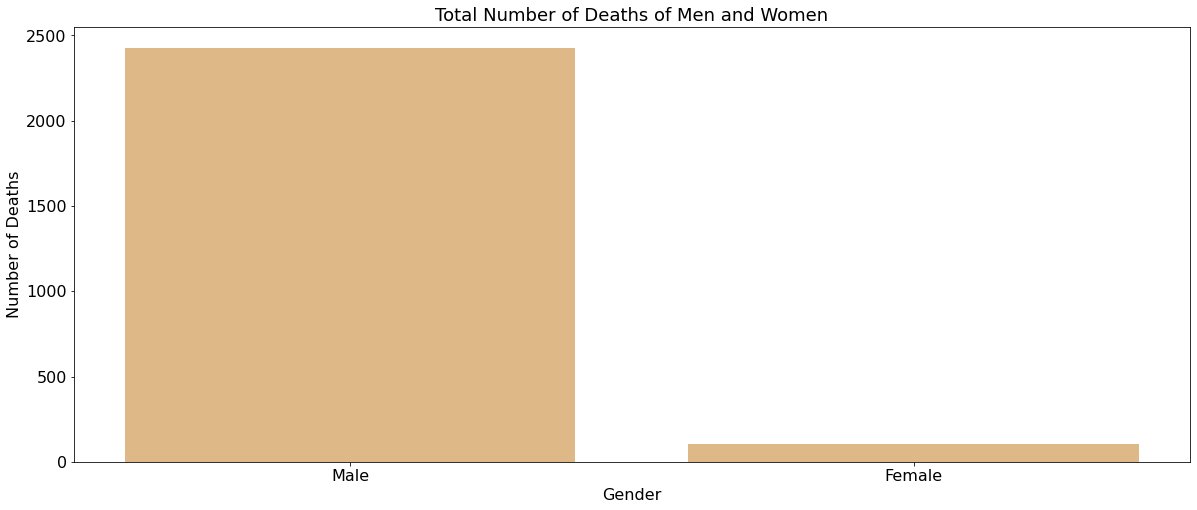

In [11]:
plt.figure(figsize=(20,8))
plt.title("Total Number of Deaths of Men and Women", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel("Number of Deaths", fontsize=16)
plt.xlabel("Gender", fontsize=16)

plt.bar(genders.index, genders.values, color="burlywood")

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [60]:
male_deaths = df_fatalities[(df_fatalities.gender == "M") & (df_fatalities.age > 0)]

In [62]:
male_plot = px.box(data_frame=male_deaths,
                   x="manner_of_death",
                   y="age",
                   title="Age and Manner of Death of Males",
                   color="manner_of_death")
 
male_plot.update_layout(xaxis_title="Manner of Death",
                    yaxis_title="Age at Death")

male_plot.show()

In [24]:
female_deaths = df_fatalities[(df_fatalities.gender == "F") & (df_fatalities.age > 0)]

In [66]:
female_plot = px.box(data_frame=female_deaths,
                     x="manner_of_death",
                     y="age",
                     title="Age and Manner of Death of Females",
                     color="manner_of_death")
 
female_plot.update_layout(xaxis_title="Manner of Death",
                          yaxis_title="Age at Death")

female_plot.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [12]:
total_cases = len(df_fatalities.armed)
unarmed1 = len(df_fatalities[df_fatalities.armed == "undetermined"])
unarmed2 = len(df_fatalities[df_fatalities.armed == 0])
unarmed3 = len(df_fatalities[(df_fatalities.armed == "unarmed")])

In [13]:
armed = total_cases - (unarmed1 + unarmed2 + unarmed3)
pct_armed = round((armed / total_cases) * 100, 2)
print(f"People were armed in {pct_armed}% of police killings")

People were armed in 88.28% of police killings


In [14]:
weapon_type = df_fatalities.groupby(by="armed", as_index=False).agg({"race": pd.Series.count})
weapon_type.rename(columns={"race": "Deaths", "armed": "Weapon"}, inplace=True)
weapon_type.drop(index=0, inplace=True)
weapon_type.reset_index(drop=True, inplace=True)

weapon_type.head()

,Weapon,Deaths
0,Taser,9
1,air conditioner,1
2,ax,9
3,baseball bat,8
4,baseball bat and bottle,1


<BarContainer object of 68 artists>

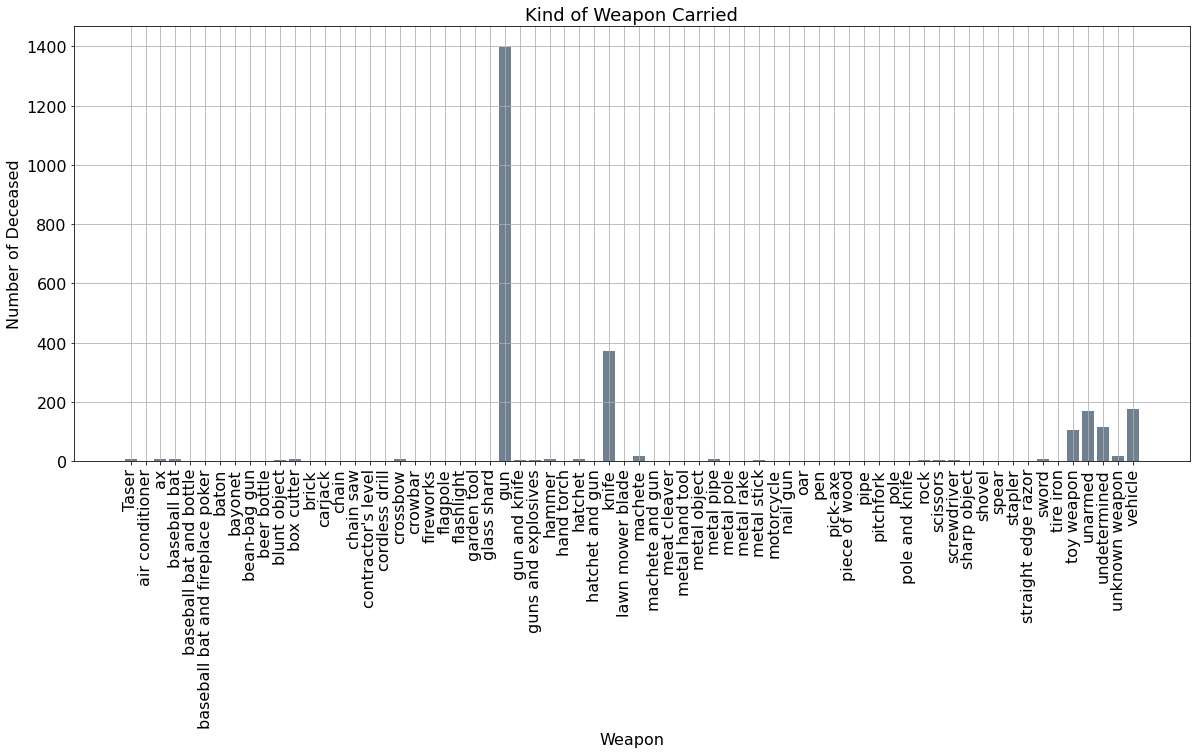

In [15]:
plt.figure(figsize=(20,8))
plt.title("Kind of Weapon Carried", fontsize=18)

plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
plt.ylabel("Number of Deceased", fontsize=16)
plt.xlabel("Weapon", fontsize=16)

plt.grid()
plt.bar(weapon_type.Weapon, weapon_type.Deaths, color="slategrey")

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [22]:
under25 = len(df_fatalities[(df_fatalities.age > 0) & (df_fatalities.age < 25)])
under25

450

In [29]:
all_age = len(df_fatalities[df_fatalities.age > 0])
all_age

2458

In [34]:
pct_under25 = (under25 / all_age) * 100
print(f"{round(pct_under25, 2)}% of people killed were under 25 years old")

18.31% of people killed were under 25 years old


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

In [106]:
df_all_age = df_fatalities[df_fatalities.age > 0]

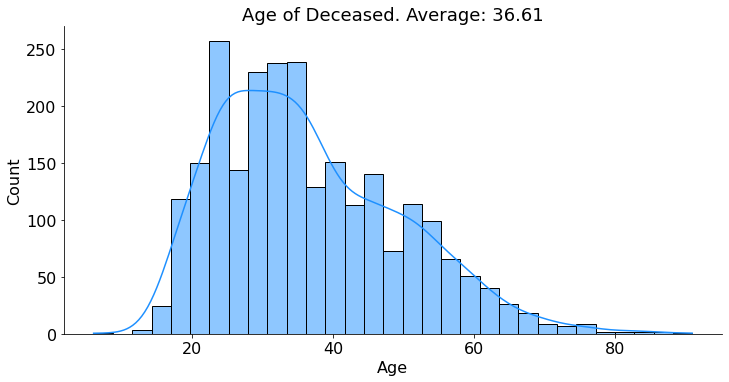

In [48]:
sns.displot(data=df_all_age,
            x="age",
            kde=True,
            aspect=2,
            color="dodgerblue")

plt.title(label=f"Age of Deceased. Average: {(df_all_age.age.mean()):.4}", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel(xlabel="Age", fontsize=16)
plt.ylabel(ylabel="Count", fontsize=16)

plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

In [50]:
white = df_all_age[df_all_age.race == "W"]

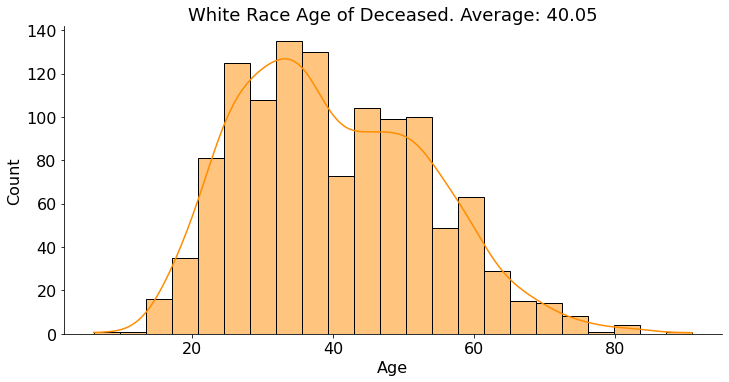

In [53]:
sns.displot(data=white,
            x="age",
            kde=True,
            aspect=2,
            color="darkorange")

plt.title(label=f"White Race Age of Deceased. Average: {(white.age.mean()):.4}", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel(xlabel="Age", fontsize=16)
plt.ylabel(ylabel="Count", fontsize=16)

plt.show()

In [54]:
black = df_all_age[df_all_age.race == "B"]

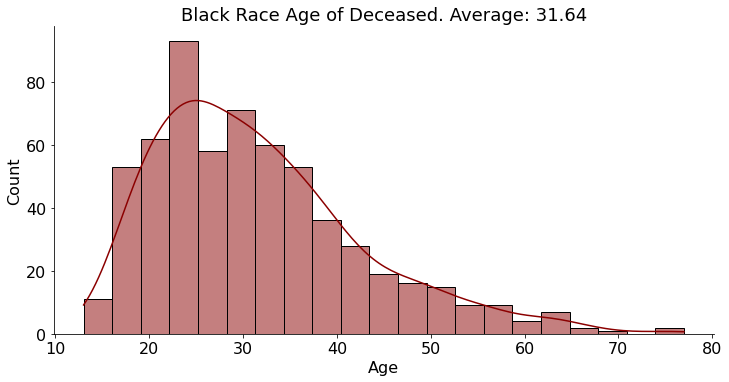

In [56]:
sns.displot(data=black,
            x="age",
            kde=True,
            aspect=2,
            color="darkred")

plt.title(label=f"Black Race Age of Deceased. Average: {(black.age.mean()):.4}", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel(xlabel="Age", fontsize=16)
plt.ylabel(ylabel="Count", fontsize=16)

plt.show()

In [60]:
hispanic = df_all_age[df_all_age.race == "H"]

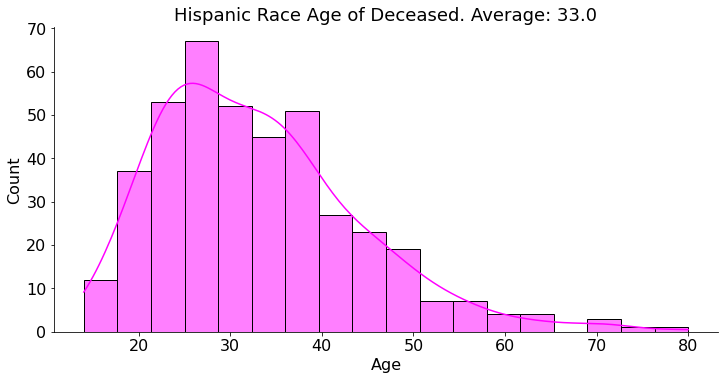

In [61]:
sns.displot(data=hispanic,
            x="age",
            kde=True,
            aspect=2,
            color="fuchsia")

plt.title(label=f"Hispanic Race Age of Deceased. Average: {(hispanic.age.mean()):.4}", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel(xlabel="Age", fontsize=16)
plt.ylabel(ylabel="Count", fontsize=16)

plt.show()

In [63]:
asian = df_all_age[df_all_age.race == "A"]

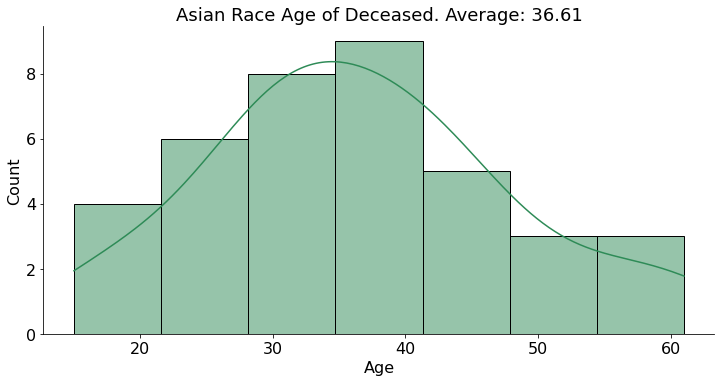

In [67]:
sns.displot(data=asian,
            x="age",
            kde=True,
            aspect=2,
            color="seagreen")

plt.title(label=f"Asian Race Age of Deceased. Average: {(asian.age.mean()):.4}", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel(xlabel="Age", fontsize=16)
plt.ylabel(ylabel="Count", fontsize=16)

plt.show()

In [68]:
native_american = df_all_age[df_all_age.race == "N"]

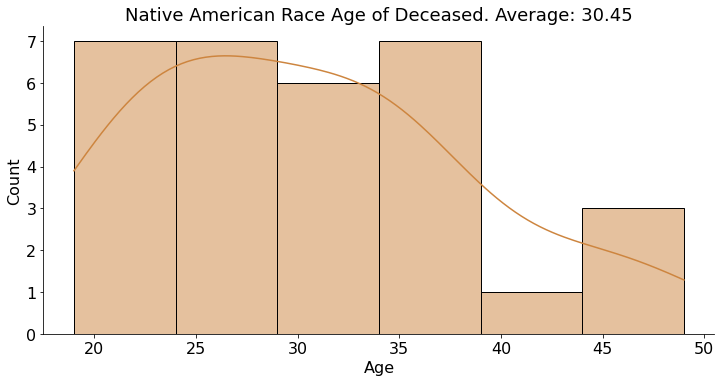

In [71]:
sns.displot(data=native_american,
            x="age",
            kde=True,
            aspect=2,
            color="peru")

plt.title(label=f"Native American Race Age of Deceased. Average: {(native_american.age.mean()):.4}", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel(xlabel="Age", fontsize=16)
plt.ylabel(ylabel="Count", fontsize=16)

plt.show()

In [72]:
other = df_all_age[df_all_age.race == "O"]

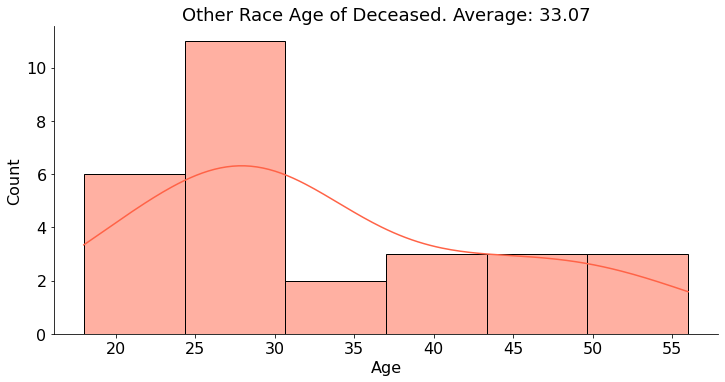

In [79]:
sns.displot(data=other,
            x="age",
            kde=True,
            aspect=2,
            color="tomato")

plt.title(label=f"Other Race Age of Deceased. Average: {(other.age.mean()):.4}", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel(xlabel="Age", fontsize=16)
plt.ylabel(ylabel="Count", fontsize=16)

plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [129]:
races

White              1201
Black               618
Hispanic            423
Asian                39
Native American      31
Other Race           28
Name: race, dtype: int64

In [114]:
races_bar_chart = px.bar(x=races.index,
                         y=races.values,
                         title="Total Number of People Killed by Race",
                         hover_name=races.index,
                         color=races.values,
                         color_continuous_scale="tealrose")
 
races_bar_chart.update_layout(xaxis_title="Race", 
                              yaxis_title="Number of Deaths", 
                              coloraxis_showscale = False)
races_bar_chart.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [118]:
mentally_ill = len(df_fatalities[df_fatalities.signs_of_mental_illness == True])
mentally_ill

633

In [120]:
pct_mental = (mentally_ill / len(df_fatalities)) * 100
print(f"{round(pct_mental, 2)}% of people killed by the police have been diagnosed with a mental illness")

24.97% of people killed by the police have been diagnosed with a mental illness


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [132]:
index_list = df_fatalities[df_fatalities.race == 0].index
df_races = df_fatalities.drop(index=index_list)

In [135]:
cities = df_races.groupby(by="city", as_index=False).agg({"name": pd.Series.count})
cities.rename(columns={"name": "death_count"}, inplace=True)
cities.sort_values(by="death_count", ascending=False, inplace=True)
top_cities = cities[:10]

In [136]:
top_cities

,city,death_count
680,Los Angeles,36
924,Phoenix,28
534,Houston,26
220,Chicago,24
1036,San Antonio,18
263,Columbus,18
58,Austin,18
638,Las Vegas,17
749,Miami,17
552,Indianapolis,14


In [137]:
cities_bar = px.bar(x=top_cities.death_count,
                    y=top_cities.city,
                    orientation="h",
                    color=top_cities.death_count,
                    color_continuous_scale="aggrnyl",                 
                    title="Top 10 Cities with the Most Police Killings")
 
cities_bar.update_layout(xaxis_title="Number of Deaths", 
                         yaxis_title="Cities",
                         yaxis={"categoryorder": "total ascending"},
                         coloraxis_showscale = False)
cities_bar.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [154]:
race_share = df_races.groupby(by=["city", "race"], as_index=False).agg({"name": pd.Series.count})
race_share.rename(columns={"name": "death_count"}, inplace=True)
race_share.race.replace({"B": "Black"}, inplace=True, regex=True)
race_share.race.replace({"W": "White"}, inplace=True, regex=True)
race_share.race.replace({"H": "Hispanic"}, inplace=True, regex=True)
race_share.race.replace({"A": "Asian"}, inplace=True, regex=True)
race_share.race.replace({"O": "Other"}, inplace=True, regex=True)
race_share.race.replace({"N": "Native American"}, inplace=True, regex=True)

race_share.head()

,city,race,death_count
0,Abbeville,Black,1
1,Abilene,White,1
2,Abingdon,White,1
3,Acworth,White,1
4,Addison,Hispanic,1


In [159]:
pivoted_df = race_share.pivot(index="city", columns="race", values="death_count")
pivoted_df.fillna(0, inplace=True)
pivoted_df.head()

race,Asian,Black,Hispanic,Native American,Other,White
city,,,,,,
Abbeville,0.00,1.00,0.00,0.00,0.00,0.00
Abilene,0.00,0.00,0.00,0.00,0.00,1.00
Abingdon,0.00,0.00,0.00,0.00,0.00,1.00
Acworth,0.00,0.00,0.00,0.00,0.00,1.00
Addison,0.00,0.00,1.00,0.00,0.00,0.00


In [162]:
total_death = pivoted_df.Asian + pivoted_df.Black + pivoted_df.Hispanic + pivoted_df["Native American"] + pivoted_df.Other + pivoted_df.White
pivoted_df["total_deaths"] = total_death
pivoted_df.sort_values(by="total_deaths", ascending=False, inplace=True)
pivoted_df.head()

race,Asian,Black,Hispanic,Native American,Other,White,total_deaths
city,,,,,,,
Los Angeles,1.00,10.00,19.00,0.00,0.00,6.00,36.00
Phoenix,0.00,2.00,11.00,3.00,0.00,12.00,28.00
Houston,1.00,15.00,6.00,1.00,0.00,3.00,26.00
Chicago,0.00,21.00,1.00,0.00,0.00,2.00,24.00
San Antonio,0.00,3.00,12.00,0.00,0.00,3.00,18.00


In [164]:
pct_asian = round((pivoted_df.Asian / pivoted_df.total_deaths) * 100, 2)
pct_black = round((pivoted_df.Black / pivoted_df.total_deaths) * 100, 2)
pct_hispanic = round((pivoted_df.Hispanic / pivoted_df.total_deaths) * 100, 2)
pct_native = round((pivoted_df["Native American"] / pivoted_df.total_deaths) * 100, 2)
pct_other = round((pivoted_df.Other / pivoted_df.total_deaths) * 100, 2)
pct_white = round((pivoted_df.White / pivoted_df.total_deaths) * 100, 2)

pivoted_df["pct_asian"] = pct_asian
pivoted_df["pct_black"] = pct_black
pivoted_df["pct_hispanic"] = pct_hispanic
pivoted_df["pct_native"] = pct_native
pivoted_df["pct_other"] = pct_other
pivoted_df["pct_white"] = pct_white

In [166]:
pivoted_df.head(10)

race,Asian,Black,Hispanic,Native American,Other,White,total_deaths,pct_asian,pct_black,pct_hispanic,pct_native,pct_other,pct_white
city,,,,,,,,,,,,,
Los Angeles,1.00,10.00,19.00,0.00,0.00,6.00,36.00,2.78,27.78,52.78,0.00,0.00,16.67
Phoenix,0.00,2.00,11.00,3.00,0.00,12.00,28.00,0.00,7.14,39.29,10.71,0.00,42.86
Houston,1.00,15.00,6.00,1.00,0.00,3.00,26.00,3.85,57.69,23.08,3.85,0.00,11.54
Chicago,0.00,21.00,1.00,0.00,0.00,2.00,24.00,0.00,87.50,4.17,0.00,0.00,8.33
San Antonio,0.00,3.00,12.00,0.00,0.00,3.00,18.00,0.00,16.67,66.67,0.00,0.00,16.67
Columbus,0.00,11.00,0.00,0.00,1.00,6.00,18.00,0.00,61.11,0.00,0.00,5.56,33.33
Austin,0.00,3.00,2.00,0.00,0.00,13.00,18.00,0.00,16.67,11.11,0.00,0.00,72.22
Las Vegas,0.00,3.00,5.00,0.00,0.00,9.00,17.00,0.00,17.65,29.41,0.00,0.00,52.94
Miami,0.00,8.00,6.00,0.00,0.00,3.00,17.00,0.00,47.06,35.29,0.00,0.00,17.65


# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [180]:
usa_states = df_races.groupby(by="state", as_index=False).agg({"name": pd.Series.count})
usa_states.rename(columns={"name": "death_count"}, inplace=True)
usa_states.sort_values(by="death_count", ascending=False, inplace=True)
usa_states[:10]

,state,death_count
4,CA,383
43,TX,211
9,FL,142
3,AZ,107
35,OH,74
36,OK,69
27,NC,68
5,CO,64
10,GA,63
14,IL,59


In [8]:
poverty_rank.head(10)

,Geographic Area,poverty_rate
25,MS,26.88
3,AZ,25.67
10,GA,23.78
32,NM,23.08
2,AR,22.96
18,LA,22.34
40,SC,22.16
49,WV,21.13
36,OK,20.66
1,AL,20.65


In [42]:
print("Arizona(AZ), Georgia(GA) and Oklahoma(OK) are part of the top ten most dangerous states and top ten states with the highest poverty rate")

Arizona(AZ), Georgia(GA) and Oklahoma(OK) are part of the top ten most dangerous states and top ten states with the highest poverty rate


In [181]:
usa_map = px.choropleth(data_frame=usa_states, locations="state",
                        color="death_count",
                        hover_name="state",
                        scope="usa",
                        locationmode="USA-states",
                        title="Police Killings by US State",
                        color_continuous_scale="plasma")
usa_map.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [24]:
df_fatalities.tail(2)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True
2534,2815,Dwayne Jeune,31/07/17,shot,knife,32.00,M,B,Brooklyn,NY,True,attack,Not fleeing,False


In [27]:
type(df_fatalities.date[222])

str

In [28]:
df_fatalities.date = pd.to_datetime(arg=df_fatalities.date)
type(df_fatalities.date[222])

pandas._libs.tslibs.timestamps.Timestamp

In [29]:
df_fatalities.tail(2)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
2533,2817,Isaiah Tucker,2017-07-31,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True
2534,2815,Dwayne Jeune,2017-07-31,shot,knife,32.00,M,B,Brooklyn,NY,True,attack,Not fleeing,False


In [ ]:
month = [date.strftime("%Y-%m") for date in df_fatalities.date]
df_fatalities["Month"] = month

In [36]:
df_fatalities.Month = pd.to_datetime(arg=df_fatalities.Month)
df_fatalities.tail(2)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,Month
2533,2817,Isaiah Tucker,2017-07-31,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True,2017-07-01
2534,2815,Dwayne Jeune,2017-07-31,shot,knife,32.00,M,B,Brooklyn,NY,True,attack,Not fleeing,False,2017-07-01


In [39]:
monthly_deaths = df_fatalities.groupby(by="Month", as_index=False).agg({"name": pd.Series.count})
monthly_deaths.rename(columns={"name": "Deaths"}, inplace=True)
monthly_deaths.head()

,Month,Deaths
0,2015-01-01,70
1,2015-02-01,78
2,2015-03-01,87
3,2015-04-01,88
4,2015-05-01,85


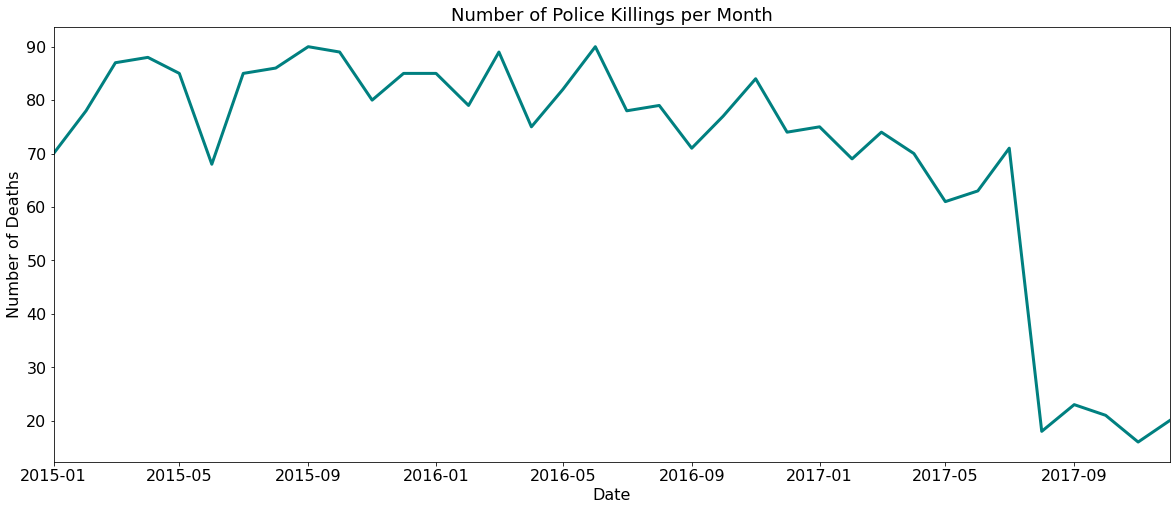

In [44]:
plt.figure(figsize=(20, 8))
plt.title("Number of Police Killings per Month",  fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel(xlabel="Date", fontsize=16)
plt.ylabel(ylabel="Number of Deaths", fontsize=16)
plt.xlim(monthly_deaths.Month.min(), monthly_deaths.Month.max())

plt.plot(monthly_deaths.Month, 
         monthly_deaths.Deaths,
         color="teal", 
         linestyle="-", 
         linewidth=3)

plt.show()

In [48]:
print("Analyzing the chart above, monthly police killings remained pretty much the same for about two years within a range of 68-88 then a sharp decline \n"
      "happened in August, 2017 and the monthly deaths have been low since then")

Analyzing the chart above, monthly police killings remained pretty much the same for about two years within a range of 68-88 then a sharp decline 
happened in August, 2017 and the monthly deaths have been low since then


# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).

In [ ]:
# After all my various analysis I've come to the following conclusions:

# The higher the poverty rate in a state, the lower the high school graduation rate and vice versa
# The White race is the most dominant race in all of USA while the Asian race is the least dominant
# The White race is also the most killed race by the US police while the Native American race is the least killed 
# 4.2% of police killings are females and a staggering 95.8% are males 
# People were armed with one weapon or another in 88.28% of police killings
# A person is much more likey to be killed by a police if they are armed ESPECIALLY with a gun
# 18.31% of people killed by US police were under 25 years old
# The average age of police killings is 37 years
# 24.97% of people killed by the police have been diagnosed with a mental illness
# Los Angeles, Phoenix, Houston, Chicago and San Antonio are the top 5 most dangerous cities in the USA
# California, Texas, Florida, Arizona and Ohio are the top 5 most dangerous states in the USA
# Arizona(AZ), Georgia(GA) and Oklahoma(OK) are part of the top ten most dangerous states and top ten states with the highest poverty rate
# The higher the poverty rate in a state, the more dangerous the state is as regard police killings

# Finally, being a White male in his late 30s armed with a gun living in Los Angeles, California has the highest likelihood of being killed by a police